- Meetvakken: measurement sections (where traffic is measured)
- Telpunten: counting points specific locations where traffic is counted

In [21]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
import json
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

load all sensor data

In [23]:
root = next((p for p in [Path.cwd(), *Path.cwd().parents] if (p / ".git").exists()), Path.cwd())
base = root / "data_raw" / "Sensors"

print(f"\nFiles found:")
for f in sorted(base.glob("*")):
    print(f"  {f.name} ({f.stat().st_size / 1024**2:.2f} MB)")


Files found:
  Meetvakken_WGS84.dbf (44.31 MB)
  Meetvakken_WGS84.prj (0.00 MB)
  Meetvakken_WGS84.shp (38.40 MB)
  Meetvakken_WGS84.shx (0.62 MB)
  Telpunten_WGS84.dbf (10.08 MB)
  Telpunten_WGS84.prj (0.00 MB)
  Telpunten_WGS84.shp (0.52 MB)
  Telpunten_WGS84.shx (0.15 MB)


load meetvakken with all attributes

In [24]:
meetvakken_path = base / "Meetvakken_WGS84.shp"
meetvakken_gdf = gpd.read_file(meetvakken_path)

print(f"  Shape: {meetvakken_gdf.shape}")
print(f"  CRS: {meetvakken_gdf.crs}")
print(f"  Geometry type: {meetvakken_gdf.geometry.type.unique()}")
print(f"  Bounds: {meetvakken_gdf.total_bounds}")
print(f"\nALL {len(meetvakken_gdf.columns)} columns:")
print(meetvakken_gdf.columns.tolist())

  Shape: (81506, 10)
  CRS: EPSG:4326
  Geometry type: ['LineString']
  Bounds: [ 3.35888106 50.75379682  7.22742608 53.43347583]

ALL 10 columns:
['id', 'naam', 'dgl_loc', 'lengte', 'wegtype', 'meetgeg', 'ref_begin', 'ref_eind', 'ref_loc', 'geometry']


same for telpunten

In [25]:
telpunten_path = base / "Telpunten_WGS84.shp"
telpunten_gdf = gpd.read_file(telpunten_path)

print(f"TELPUNTEN loaded:")
print(f"  Shape: {telpunten_gdf.shape}")
print(f"  CRS: {telpunten_gdf.crs}")
print(f"  Geometry type: {telpunten_gdf.geometry.type.unique()}")
print(f"  Bounds: {telpunten_gdf.total_bounds}")
print(f"\nALL {len(telpunten_gdf.columns)} columns:")
print(telpunten_gdf.columns.tolist())

TELPUNTEN loaded:
  Shape: (19536, 8)
  CRS: EPSG:4326
  Geometry type: ['Point']
  Bounds: [ 3.55780523 50.75805081  7.22667204 53.43307718]

ALL 8 columns:
['id', 'naam', 'dgl_loc', 'meetricht', 'wegtype', 'meetgeg', 'ref_mvak', 'geometry']


Data types and basic info

In [26]:
meetvakken_gdf.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81506 entries, 0 to 81505
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         81506 non-null  int64   
 1   naam       81317 non-null  object  
 2   dgl_loc    81506 non-null  object  
 3   lengte     81506 non-null  float64 
 4   wegtype    81506 non-null  object  
 5   meetgeg    81506 non-null  int32   
 6   ref_begin  81506 non-null  int64   
 7   ref_eind   81506 non-null  int64   
 8   ref_loc    81506 non-null  int64   
 9   geometry   81506 non-null  geometry
dtypes: float64(1), geometry(1), int32(1), int64(4), object(3)
memory usage: 5.9+ MB


In [27]:
telpunten_gdf.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         19536 non-null  int64   
 1   naam       19536 non-null  object  
 2   dgl_loc    19536 non-null  object  
 3   meetricht  19536 non-null  int64   
 4   wegtype    19536 non-null  object  
 5   meetgeg    19536 non-null  int32   
 6   ref_mvak   0 non-null      object  
 7   geometry   19536 non-null  geometry
dtypes: geometry(1), int32(1), int64(2), object(4)
memory usage: 1.1+ MB


missing values?

In [28]:
missing_meetvakken = pd.DataFrame({
    'Column': meetvakken_gdf.columns,
    'Missing_Count': meetvakken_gdf.isnull().sum(),
    'Missing_Percentage': (meetvakken_gdf.isnull().sum() / len(meetvakken_gdf)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print(missing_meetvakken.to_string())

              Column  Missing_Count  Missing_Percentage
naam            naam            189                0.23
id                id              0                0.00
dgl_loc      dgl_loc              0                0.00
lengte        lengte              0                0.00
wegtype      wegtype              0                0.00
meetgeg      meetgeg              0                0.00
ref_begin  ref_begin              0                0.00
ref_eind    ref_eind              0                0.00
ref_loc      ref_loc              0                0.00
geometry    geometry              0                0.00


In [29]:
missing_telpunten = pd.DataFrame({
    'Column': telpunten_gdf.columns,
    'Missing_Count': telpunten_gdf.isnull().sum(),
    'Missing_Percentage': (telpunten_gdf.isnull().sum() / len(telpunten_gdf)) * 100
}).sort_values('Missing_Percentage', ascending=False)


print(missing_telpunten.to_string())

              Column  Missing_Count  Missing_Percentage
ref_mvak    ref_mvak          19536              100.00
id                id              0                0.00
naam            naam              0                0.00
dgl_loc      dgl_loc              0                0.00
meetricht  meetricht              0                0.00
wegtype      wegtype              0                0.00
meetgeg      meetgeg              0                0.00
geometry    geometry              0                0.00


analysis of cols meetvakken

In [30]:
for col in meetvakken_gdf.columns:
    if col == 'geometry':
        continue
    
    print(f"\n{col}")

    print(f"  Type: {meetvakken_gdf[col].dtype}")
    print(f"  Non-null: {meetvakken_gdf[col].notna().sum():,} / {len(meetvakken_gdf):,}")
    print(f"  Null %: {(meetvakken_gdf[col].isna().sum() / len(meetvakken_gdf)) * 100:.2f}%")
    print(f"  Unique: {meetvakken_gdf[col].nunique():,}")
    
    #show value distribution
    unique_vals = meetvakken_gdf[col].dropna().unique()
    if len(unique_vals) <= 20:
        print(f"  All values: {sorted(unique_vals)}")
    else:
        print(f"  Sample values (first 10): {unique_vals[:10]}")
        
        #numeric columns show stats
        if pd.api.types.is_numeric_dtype(meetvakken_gdf[col]):
            print(f"  Min: {meetvakken_gdf[col].min()}")
            print(f"  Max: {meetvakken_gdf[col].max()}")
            print(f"  Mean: {meetvakken_gdf[col].mean():.2f}")
            print(f"  Median: {meetvakken_gdf[col].median():.2f}")


id
  Type: int64
  Non-null: 81,506 / 81,506
  Null %: 0.00%
  Unique: 81,506
  Sample values (first 10): [5884 5824 4864 4863 4862 4861 4860 4859 4858 4857]
  Min: 1
  Max: 81506
  Mean: 40753.50
  Median: 40753.50

naam
  Type: object
  Non-null: 81,317 / 81,506
  Null %: 0.23%
  Unique: 78,880
  Sample values (first 10): ['0301hrl0217ra0' '0151hrl0454ra0' '0281hrr0343ra0' '3261hrl0052ra0'
 '0201hrl0463ra0' '0011hrl0164ra1' '0501hrr0961rb0' '0500vwr2382ra0'
 '0321hrr0540ra0' '0271hrr0227ra0']

dgl_loc
  Type: object
  Non-null: 81,506 / 81,506
  Null %: 0.00%
  Unique: 81,506
  Sample values (first 10): ['RWS01_MONIBAS_0301hrl0217ra0' 'RWS01_MONIBAS_0151hrl0454ra0'
 'RWS01_MONIBAS_0281hrr0343ra0' 'RWS01_MONIBAS_3261hrl0052ra0'
 'RWS01_MONIBAS_0201hrl0463ra0' 'RWS01_MONIBAS_0011hrl0164ra1'
 'RWS01_MONIBAS_0501hrr0961rb0' 'RWS01_MONIBAS_0500vwr2382ra0'
 'RWS01_MONIBAS_0321hrr0540ra0' 'RWS01_MONIBAS_0271hrr0227ra0']

lengte
  Type: float64
  Non-null: 81,506 / 81,506
  Null %: 0.00%
  

analysis telpunten

In [31]:
for col in telpunten_gdf.columns:
    if col == 'geometry':
        continue
    
    print(f"\n{col}")

    print(f"  Type: {telpunten_gdf[col].dtype}")
    print(f"  Non-null: {telpunten_gdf[col].notna().sum():,} / {len(telpunten_gdf):,}")
    print(f"  Null %: {(telpunten_gdf[col].isna().sum() / len(telpunten_gdf)) * 100:.2f}%")
    print(f"  Unique: {telpunten_gdf[col].nunique():,}")

    unique_vals = telpunten_gdf[col].dropna().unique()
    if len(unique_vals) <= 20:
        print(f"  All values: {sorted(unique_vals)}")
    else:
        print(f"  Sample values (first 10): {unique_vals[:10]}")

        if pd.api.types.is_numeric_dtype(telpunten_gdf[col]):
            print(f"  Min: {telpunten_gdf[col].min()}")
            print(f"  Max: {telpunten_gdf[col].max()}")
            print(f"  Mean: {telpunten_gdf[col].mean():.2f}")
            print(f"  Median: {telpunten_gdf[col].median():.2f}")


id
  Type: int64
  Non-null: 19,536 / 19,536
  Null %: 0.00%
  Unique: 19,536
  Sample values (first 10): [19536 19535 19534 19533 19532 19531 19530 19529 19528 19527]
  Min: 1
  Max: 19536
  Mean: 9768.50
  Median: 9768.50

naam
  Type: object
  Non-null: 19,536 / 19,536
  Null %: 0.00%
  Unique: 19,018
  Sample values (first 10): ['0070vwj2010ra' '0070vwe1974ra' '0041hrr0118ra' '0441hrr0180ra'
 '0440vwb0181ra' '10D0321E681ED007000B' '0441hrr0199ra' '0441hrr0195ra'
 '0011hrr0868ra' '00D00F06A04100200007']

dgl_loc
  Type: object
  Non-null: 19,536 / 19,536
  Null %: 0.00%
  Unique: 19,536
  Sample values (first 10): ['RWS01_MONIBAS_0070vwj2010ra' 'RWS01_MONIBAS_0070vwe1974ra'
 'RWS01_MONIBAS_0041hrr0118ra' 'RWS01_MONIBAS_0441hrr0180ra'
 'RWS01_MONIBAS_0440vwb0181ra' 'RWS01_MONICA_10D0321E681ED007000B'
 'RWS01_MONIBAS_0441hrr0199ra' 'RWS01_MONIBAS_0441hrr0195ra'
 'RWS01_MONIBAS_0011hrr0868ra' 'RWS01_MONICA_00D00F06A04100200007']

meetricht
  Type: int64
  Non-null: 19,536 / 19,536
  N

sample data

In [32]:
meetvakken_gdf.head()

,id,naam,dgl_loc,lengte,wegtype,meetgeg,ref_begin,ref_eind,ref_loc,geometry
0,5884,0301hrl0217ra0,RWS01_MONIBAS_0301hrl0217ra0,954.00,H,4,17650,17651,17652,"LINESTRING (5.56219 52.14088, 5.56188 52.13783, 5.56176 52.13657, 5.5617 52.13599, 5.56169 52.13..."
1,5824,0151hrl0454ra0,RWS01_MONIBAS_0151hrl0454ra0,496.00,H,4,17470,17471,17472,"LINESTRING (4.3148 51.86947, 4.31437 51.86942, 4.31289 51.86923, 4.31187 51.86912, 4.31078 51.86..."
2,4864,0281hrr0343ra0,RWS01_MONIBAS_0281hrr0343ra0,611.00,H,4,14590,14591,14592,"LINESTRING (5.4604 52.23319, 5.46063 52.23351, 5.46095 52.23389, 5.46125 52.23424, 5.46156 52.23..."
3,4863,3261hrl0052ra0,RWS01_MONIBAS_3261hrl0052ra0,3119.00,H,4,14587,14588,14589,"LINESTRING (5.73552 51.82701, 5.73527 51.82698, 5.73477 51.82693, 5.73425 51.82686, 5.73363 51.8..."
4,4862,0201hrl0463ra0,RWS01_MONIBAS_0201hrl0463ra0,779.00,H,4,14584,14585,14586,"LINESTRING (4.65372 52.00418, 4.65364 52.00399, 4.65324 52.00309, 4.6527 52.00219, 4.65222 52.00..."


In [33]:
telpunten_gdf.head()

,id,naam,dgl_loc,meetricht,wegtype,meetgeg,ref_mvak,geometry
0,19536,0070vwj2010ra,RWS01_MONIBAS_0070vwj2010ra,97,H,3,None,POINT (6.61467 53.21758)
1,19535,0070vwe1974ra,RWS01_MONIBAS_0070vwe1974ra,188,H,3,None,POINT (6.56515 53.20145)
2,19534,0041hrr0118ra,RWS01_MONIBAS_0041hrr0118ra,221,H,3,None,POINT (4.71647 52.28122)
3,19533,0441hrr0180ra,RWS01_MONIBAS_0441hrr0180ra,207,H,3,None,POINT (4.45064 52.16454)
4,19532,0440vwb0181ra,RWS01_MONIBAS_0440vwb0181ra,172,H,3,None,POINT (4.44955 52.1642)


spatial analysis

In [34]:
meetvakken_rd = meetvakken_gdf.to_crs('EPSG:28992')
meetvakken_rd['length_m'] = meetvakken_rd.geometry.length
meetvakken_rd['length_km'] = meetvakken_rd['length_m'] / 1000

print("meetvakken lengths:")
print(f"  Total: {meetvakken_rd['length_km'].sum():,.1f} km")
print(f"  Mean: {meetvakken_rd['length_km'].mean():.3f} km")
print(f"  Median: {meetvakken_rd['length_km'].median():.3f} km")
print(f"  Std Dev: {meetvakken_rd['length_km'].std():.3f} km")
print(f"  Min: {meetvakken_rd['length_km'].min():.6f} km")
print(f"  Max: {meetvakken_rd['length_km'].max():.3f} km")


meetvakken_gdf['length_km'] = meetvakken_rd['length_km']

if 'Point' in telpunten_gdf.geometry.type.unique():
    telpunten_gdf['longitude'] = telpunten_gdf.geometry.x
    telpunten_gdf['latitude'] = telpunten_gdf.geometry.y
    
    print("\ntelpunten coords:")
    print(f"  Longitude range: {telpunten_gdf['longitude'].min():.4f} to {telpunten_gdf['longitude'].max():.4f}")
    print(f"  Latitude range: {telpunten_gdf['latitude'].min():.4f} to {telpunten_gdf['latitude'].max():.4f}")

meetvakken lengths:
  Total: 100,840.0 km
  Mean: 1.237 km
  Median: 0.430 km
  Std Dev: 4.664 km
  Min: 0.000998 km
  Max: 158.901 km

telpunten coords:
  Longitude range: 3.5578 to 7.2267
  Latitude range: 50.7581 to 53.4331


idk bruh

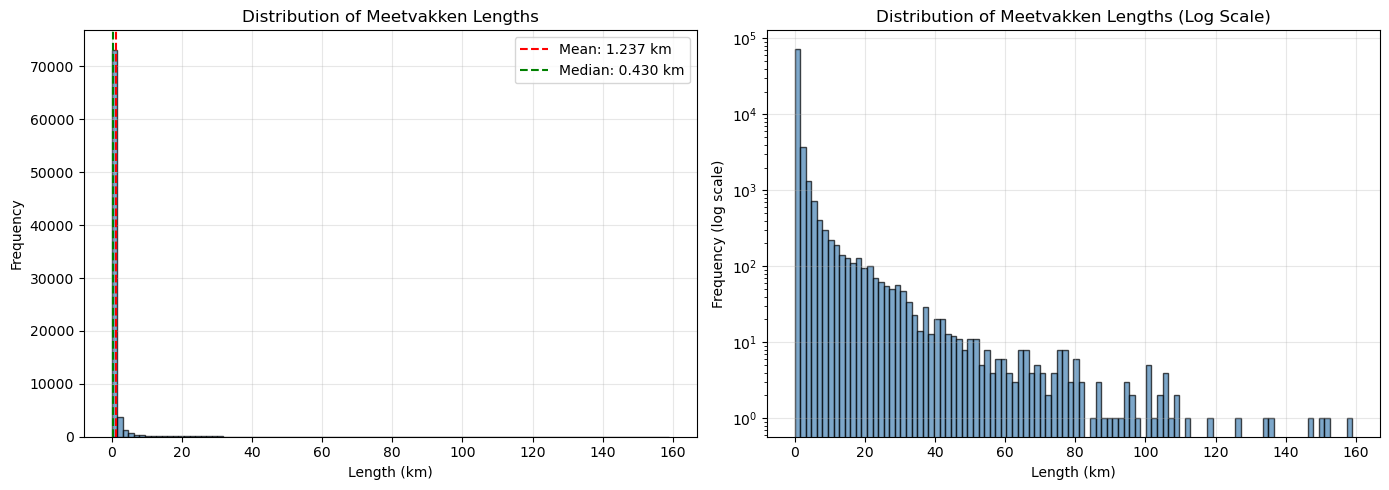

In [35]:
#length distribution histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#histogram
axes[0].hist(meetvakken_gdf['length_km'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Length (km)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Meetvakken Lengths')
axes[0].axvline(meetvakken_gdf['length_km'].mean(), color='red', linestyle='--', label=f'Mean: {meetvakken_gdf["length_km"].mean():.3f} km')
axes[0].axvline(meetvakken_gdf['length_km'].median(), color='green', linestyle='--', label=f'Median: {meetvakken_gdf["length_km"].median():.3f} km')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#log histogram
axes[1].hist(meetvakken_gdf['length_km'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Length (km)')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Distribution of Meetvakken Lengths (Log Scale)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

intewesting

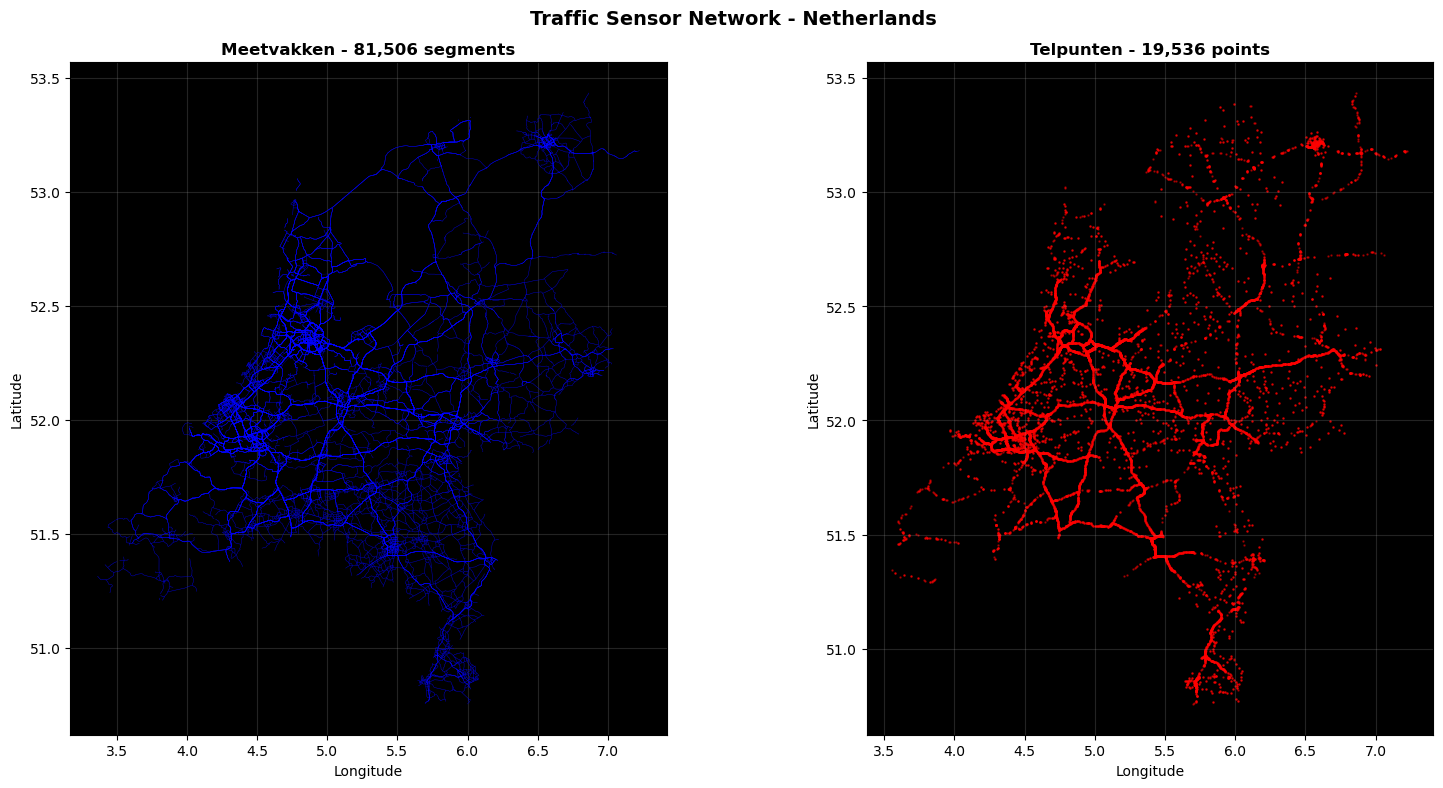

In [37]:
#visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#meetvakken
meetvakken_gdf.plot(ax=axes[0], color='blue', linewidth=0.3, alpha=0.5)
axes[0].set_title(f'Meetvakken - {len(meetvakken_gdf):,} segments', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True, alpha=0.2)
axes[0].set_facecolor("#000000")

#telepunten
telpunten_gdf.plot(ax=axes[1], color='red', markersize=0.5, alpha=0.5)
axes[1].set_title(f'Telpunten - {len(telpunten_gdf):,} points', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True, alpha=0.2)
axes[1].set_facecolor("#000000")

plt.suptitle('Traffic Sensor Network - Netherlands', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

aura!

combined

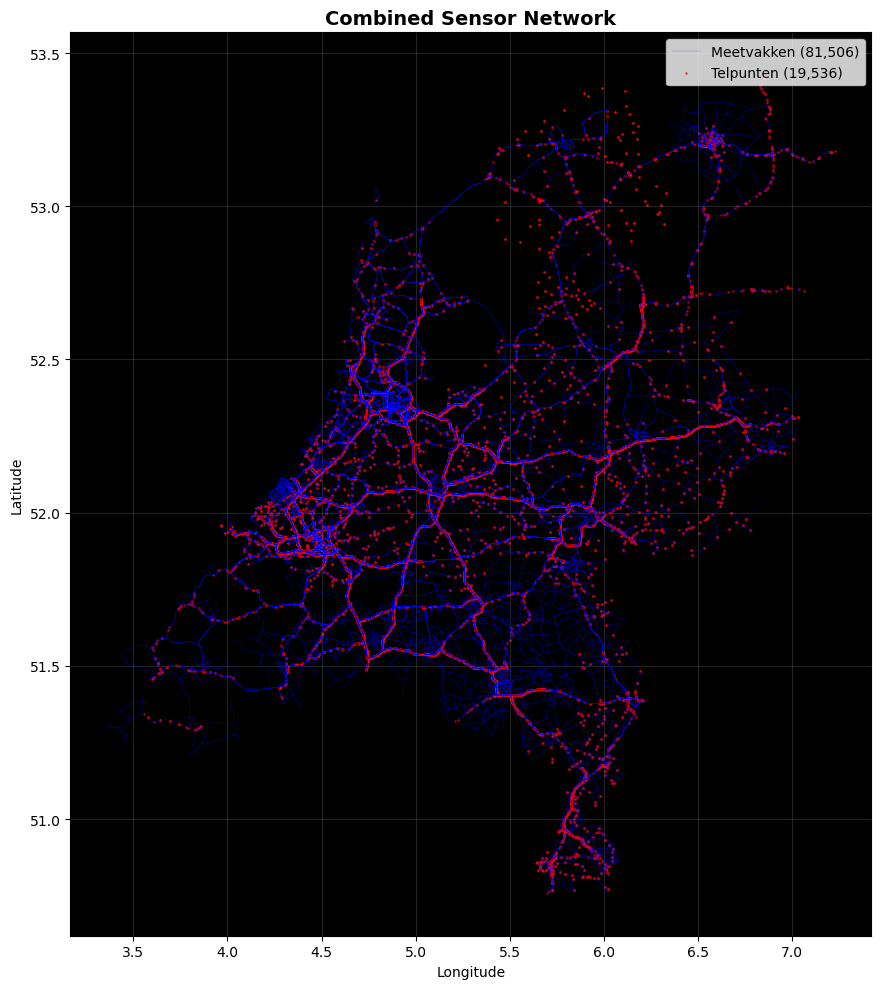

In [39]:
#combined vis
fig, ax = plt.subplots(figsize=(12, 10))

#layers
meetvakken_gdf.plot(ax=ax, color='blue', linewidth=0.3, alpha=0.4, label=f'Meetvakken ({len(meetvakken_gdf):,})')
telpunten_gdf.plot(ax=ax, color='red', markersize=0.8, alpha=0.6, label=f'Telpunten ({len(telpunten_gdf):,})')

ax.set_title('Combined Sensor Network', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.2)
ax.set_facecolor("#000000")

plt.tight_layout()
plt.show()

which to keep and which to drop

In [41]:
#analyze column usefulness

def analyze_column_usefulness(gdf, name):
    print(f"\n{name}:")
    
    recommendations = {
        'KEEP': [],
        'MAYBE': [],
        'DROP': []
    }
    
    for col in gdf.columns:
        if col == 'geometry':
            recommendations['KEEP'].append(col)
            continue
            
        null_pct = (gdf[col].isna().sum() / len(gdf)) * 100
        unique_pct = (gdf[col].nunique() / len(gdf)) * 100
        
        #decision logic
        if null_pct > 90:
            recommendations['DROP'].append(f"{col} (null: {null_pct:.1f}%)")
        elif null_pct > 50:
            recommendations['MAYBE'].append(f"{col} (null: {null_pct:.1f}%, unique: {gdf[col].nunique()})")
        elif gdf[col].nunique() == 1:
            recommendations['DROP'].append(f"{col} (only 1 value: {gdf[col].iloc[0]})")
        elif unique_pct > 95 and not pd.api.types.is_numeric_dtype(gdf[col]):
            recommendations['MAYBE'].append(f"{col} (too unique: {unique_pct:.1f}%)")
        else:
            recommendations['KEEP'].append(f"{col} (null: {null_pct:.1f}%, unique: {gdf[col].nunique()})")
    
    for category, cols in recommendations.items():
        print(f"\n{category} ({len(cols)} columns):")
        for c in cols:
            print(f"  - {c}")
    
    return recommendations

meetvakken_recs = analyze_column_usefulness(meetvakken_gdf, "MEETVAKKEN")
telpunten_recs = analyze_column_usefulness(telpunten_gdf, "TELPUNTEN")


MEETVAKKEN:

KEEP (8 columns):
  - id (null: 0.0%, unique: 81506)
  - lengte (null: 0.0%, unique: 6769)
  - wegtype (null: 0.0%, unique: 2)
  - ref_begin (null: 0.0%, unique: 81506)
  - ref_eind (null: 0.0%, unique: 81506)
  - ref_loc (null: 0.0%, unique: 81506)
  - geometry
  - length_km (null: 0.0%, unique: 79349)

MAYBE (2 columns):
  - naam (too unique: 96.8%)
  - dgl_loc (too unique: 100.0%)

DROP (1 columns):
  - meetgeg (only 1 value: 4)

TELPUNTEN:

KEEP (7 columns):
  - id (null: 0.0%, unique: 19536)
  - meetricht (null: 0.0%, unique: 361)
  - wegtype (null: 0.0%, unique: 2)
  - meetgeg (null: 0.0%, unique: 2)
  - geometry
  - longitude (null: 0.0%, unique: 16791)
  - latitude (null: 0.0%, unique: 16790)

MAYBE (2 columns):
  - naam (too unique: 97.3%)
  - dgl_loc (too unique: 100.0%)

DROP (1 columns):
  - ref_mvak (null: 100.0%)
